In [1]:
from __future__ import print_function
import ROOT
from ROOT import TChain
from larcv import larcv

Welcome to JupyROOT 6.26/08


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ROOT.TFile.Open('../data/root/test_40k.root').ls()

TFile**		../data/root/test_40k.root	
 TFile*		../data/root/test_40k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


40000 entries found!
Object type: <cppyy.gbl.larcv.EventImage2D object at 0x559b9d2fc9e0>


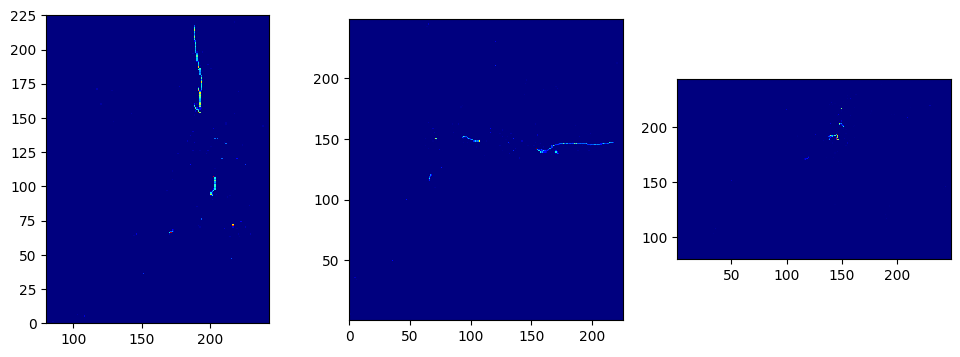

In [4]:
from larcv import larcv

# Create TChain, count # of entries
chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('../data/root/test_40k.root')
print(chain_image2d.GetEntries(),'entries found!')

# Get a specific event (first entry)
chain_image2d.GetEntry(0)
cpp_object = chain_image2d.image2d_data_branch
print('Object type:',cpp_object)

# Get std::vector<larcv::Image2D>
image2d_array = cpp_object.as_vector()
# Dump images
fig, axes = plt.subplots(1, image2d_array.size(), figsize=(12,4), facecolor='w')
for index,image2d in enumerate(image2d_array):
    image2d_numpy = larcv.as_ndarray(image2d)
    axes[index].imshow(image2d_numpy, interpolation='none',cmap='jet')
    # Find bounds for non-zero pixels + padding of 5 pixels
    nz_pixels=np.where(image2d_numpy>0.0)
    ylim = (np.min(nz_pixels[0])-5,np.max(nz_pixels[0])+5)
    xlim = (np.min(nz_pixels[1])-5,np.max(nz_pixels[1])+5)
    # Adjust for allowed image range
    ylim = (np.max((ylim[0],0)), np.min((ylim[1],image2d_numpy.shape[1]-1)))
    xlim = (np.max((xlim[0],0)), np.min((xlim[1],image2d_numpy.shape[0]-1)))
    # Set range
    axes[index].set_ylim(ylim)
    axes[index].set_xlim(xlim)
plt.show()

In [5]:
# Create TChain, count # of entries
chain_particle = ROOT.TChain('particle_mctruth_tree')
chain_particle.AddFile('../data/root/test_40k.root')
print(chain_image2d.GetEntries(),'entries found!')

# Get a specific event (first entry)
chain_particle.GetEntry(0)
cpp_object = chain_particle.particle_mctruth_branch
print('Object type: {}\n'.format(str(cpp_object)))

# Dump particle information
print('Checking particle information for 1st entry...')
for particle in cpp_object.as_vector():
    print('PDG Code: {}'.format(particle.pdg_code()))
    print('Initial energy: {:.3} GeV'.format(particle.energy_init()))

40000 entries found!
Object type: <cppyy.gbl.larcv.EventParticle object at 0x559b9dd92530>

Checking particle information for 1st entry...
PDG Code: 11
Initial energy: 0.138 GeV
